## Simple linear regression tutorial

**lm() Function**

- This function creates the relationship model between the predictor and the response variable.

**Syntax**

- The basic syntax for lm() function in linear regression is :
    - lm(Formula,Data)
    
        **Formula** : symbol presenting the relation between x and y.<br>
        **Data** : vector on which the formula will be applied.

In [2]:
x <- c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131) #height
y <- c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48) #weight

In [3]:
# Apply the lm() function.
relation <- lm(y~x)

In [4]:
print(relation)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   -38.4551       0.6746  



#### Residuals, P-value, R squared

In [5]:
print(summary(relation))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3002 -1.6629  0.0412  1.8944  3.9775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -38.45509    8.04901  -4.778  0.00139 ** 
x             0.67461    0.05191  12.997 1.16e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.253 on 8 degrees of freedom
Multiple R-squared:  0.9548,	Adjusted R-squared:  0.9491 
F-statistic: 168.9 on 1 and 8 DF,  p-value: 1.164e-06



**predict() Function**

Syntax:
- predict(object, newdata)

    **object** formula which is already created using the lm() function.<br>
    **newdata** vector containing the new value for predictor variable.


In [6]:
# Find weight of a person with height 170
a <- data.frame(x = 170)
a

x
170


In [7]:
result <- predict(relation,a)

In [8]:
print(result)

       1 
76.22869 


#### Visualiser la regression

In [9]:
library(repr)

# Change plot size to 4 x 4
options(repr.plot.width=4, repr.plot.height=4)

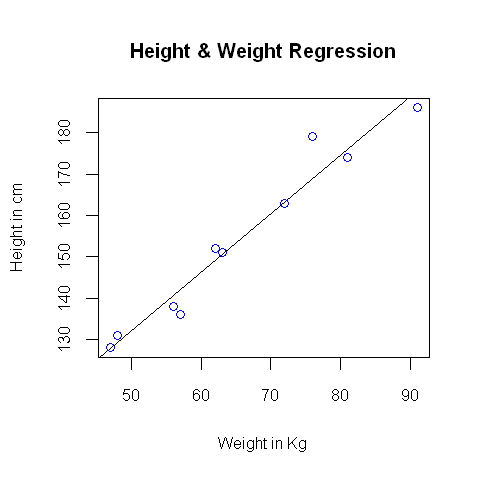

In [10]:
plot(y,x, col = "blue", main = "Height & Weight Regression", cex.main=1, cex.lab=0.8, cex.axis=0.8,
abline(lm(x~y)),xlab = "Weight in Kg",ylab = "Height in cm")

# Linear regression in action

In [11]:
dataset = read.csv("C:/Users/achra/Downloads/data-session2.csv", header=T,
colClasses = c("numeric", "numeric", "numeric"))

In [12]:
head(dataset)

Month,Spend,Sales
1,1000,9914
2,4000,40487
3,5000,54324
4,4500,50044
5,3000,34719
6,4000,42551


## Simple (One Variable) and Multiple Linear Regression Using lm()

#### Simple

In [12]:
simple.fit = lm(Sales~Spend, data=dataset)

In [13]:
summary(simple.fit)


Call:
lm(formula = Sales ~ Spend, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
 -3385  -2097    258   1726   3034 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1383.4714  1255.2404   1.102    0.296    
Spend         10.6222     0.1625  65.378 1.71e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2313 on 10 degrees of freedom
Multiple R-squared:  0.9977,	Adjusted R-squared:  0.9974 
F-statistic:  4274 on 1 and 10 DF,  p-value: 1.707e-14


#### Multiple

In [14]:
multi.fit = lm(Sales~Spend+Month, data=dataset)

In [15]:
summary(multi.fit)


Call:
lm(formula = Sales ~ Spend + Month, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1793.73 -1558.33    -1.73  1374.19  1911.58 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -567.6098  1041.8836  -0.545  0.59913    
Spend         10.3825     0.1328  78.159 4.65e-14 ***
Month        541.3736   158.1660   3.423  0.00759 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1607 on 9 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9988 
F-statistic:  4433 on 2 and 9 DF,  p-value: 3.368e-14


#### Compare R-squared
- Simple : R-squared:  0.9977<br>
- Multiple : R-squared:  0.999

#### Compare Risiduals
- Simple : Max = 3034
- Multiple : Max = 1911.58 

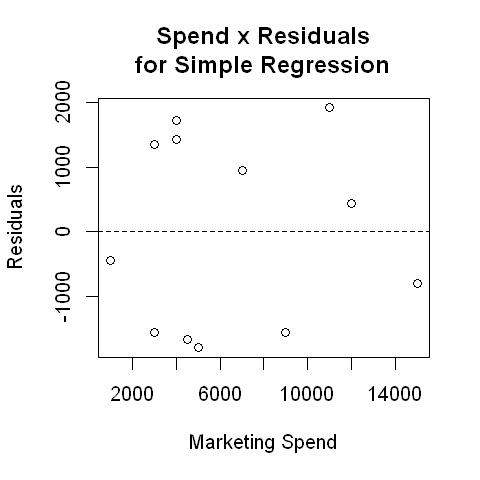

In [16]:
plot(multi.fit$resid~dataset$Spend[order(dataset$Spend)],
 main="Spend x Residuals\nfor Simple Regression",
 xlab="Marketing Spend", ylab="Residuals")
abline(h=0,lty=2)

# What if Linear regression does not work ?

In [26]:
dataset = read.csv("C:/Users/achra/Downloads/data-session2bis.csv", header=T,
colClasses = c("numeric", "numeric", "numeric"))

In [18]:
multi.fit = lm(Sales~Spend+Month, data=dataset)

In [19]:
summary(multi.fit)


Call:
lm(formula = Sales ~ Spend + Month, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-32950 -24485 -14137  17040  91953 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 22591.345  25533.658   0.885    0.399
Spend           2.134      3.255   0.655    0.529
Month       -2387.943   3876.207  -0.616    0.553

Residual standard error: 39390 on 9 degrees of freedom
Multiple R-squared:  0.05571,	Adjusted R-squared:  -0.1541 
F-statistic: 0.2655 on 2 and 9 DF,  p-value: 0.7726


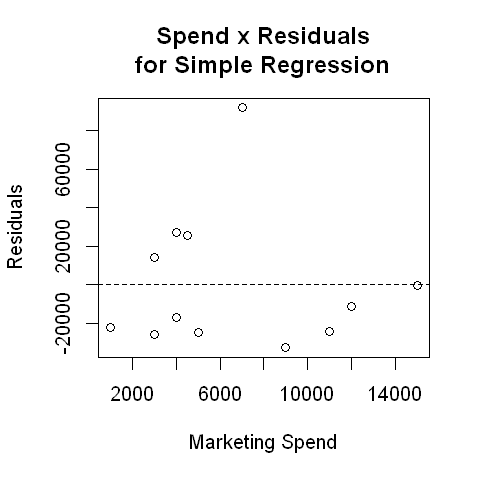

In [20]:
#Spend x Residuals Plot
plot(multi.fit$resid~dataset$Spend[order(dataset$Spend)],
 main="Spend x Residuals\nfor Simple Regression",
 xlab="Marketing Spend", ylab="Residuals")
abline(h=0,lty=2)

# Exercice

In [13]:
# Packages
library(tidyverse)  # data manipulation and visualization
library(modelr)     # provides easy pipeline modeling functions
library(broom)      # helps to tidy up model outputs

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [14]:
advertising <- read_csv("C:/Users/achra/Downloads/Advertising.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
-- Column specification ------------------------------------------------------------------------------------------------
cols(
  X1 = col_double(),
  TV = col_double(),
  Radio = col_double(),
  Newspaper = col_double(),
  Sales = col_double()
)



In [15]:
head(advertising)

X1,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [16]:
sample <- sample(c(TRUE, FALSE), nrow(advertising), replace = T, prob = c(0.6,0.4))

In [23]:
# Afficher les premières lignes du Dataframe

In [24]:
# Modifier le code suivant pour supprimer la colonne X1
advertising = subset(DATA, select = -c())

ERROR: Error in subset(DATA, select = -c()): objet 'DATA' introuvable


In [ ]:
# Afficher les premières lignes du Dataframe

In [ ]:
set.seed(...) # ??

In [ ]:
# code 1
sample <- sample(c(TRUE, FALSE), nrow(advertising), replace = T, prob = c(0.6,0.4))

In [ ]:
# code 2
train <- advertising[sample, ]
test <- advertising[!sample, ]

**Q1** Quelle est l'utilité des codes 1 et 2 ?

...

...

...

In [ ]:
# Déclarer le model de regression pour la variable  expliquer (Sales) et fonction de la variable (TV)
model1 <- 

In [ ]:
# Afficher les détails de la regrssion
# summary

In [ ]:
# Evaluer les coeff
tidy(model1)

In [ ]:
# R squared
rsquare(model1, data = train)

In [ ]:
# Evaluation graphique
ggplot(train, aes(TV, Sales)) +
  geom_point() +
  geom_smooth(method = "lm") +
  geom_smooth(se = FALSE, color = "red")

In [ ]:
head((test <- test %>% 
      add_predictions(model1)))

In [ ]:
# test MSE
test %>% 
  add_predictions(model1) %>%
  summarise(MSE = mean((Sales - pred)^2))

# Multiple Regression

In [ ]:
# Déclarer le model2 qui prend en compte les variables (TV, Radio et Newspaper)
model2 <- 

In [ ]:
# summary


In [ ]:
# Evaluer les coeffs


In [ ]:
# Cette methode permet de comparer deux modèles, analyser les résultats
list(model1 = broom::glance(model1), model2 = broom::glance(model2))

**Q2** Que remarquez-vous ?

...

...

...

In [ ]:
test %>%
  gather_predictions(model1, model2) %>%
  group_by(model) %>%
  summarise(MSE = mean((Sales-pred)^2))

In [ ]:
# add_predictions(model2) à l'échantillon de test, le résultat doit ressembler à la cellule ci dessous :